# 다빈도 명사추출 시각화

# 사용 모듈

- KoNLPy
- matplotlib
- PyTagCloud
- WordCloud

# Pytagcloud 설치 순서

- pip install pygame
- pip install pytagcloud
- pip install simplejson

In [1]:
from collections import Counter # 단어들을 집계하기 위해서 사용
from konlpy.tag import Okt # 형태소 분석기
import pytagcloud #pygame 패키지에 의존적, pygame 설치 요구

pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
f=open("data/data.txt",encoding='utf-8')
data=f.read()
print(data)

골든스테이트가 2018년 이후 첫 플레이오프 파이널 우승에 1승만 남겨 놓았다. 보스턴과의 2022년 파이널 맞대결 시리즈 5차전에서 기분 좋은 재역전승을 거뒀다. 역대 파이널 5차전 승리 팀의 최종 우승 확률이 73%. 여기에 원정 6차전을 패배하더라도 7차전은 안방 일정으로 펼쳐진다. 황금 전사 군단은 플레이오프 홈 12경기 11승 1패 승률 91.7%, 평균 득실점 마진 +12.3점을 자랑 중이다. 

​

더욱 고무적인 소식은 *¹간판스타 스테픈 커리가 16득점(FG 7/22, 3P 0/9, FT 2/3), 8어시스트(1실책) 부진에 시달렸음에도 불구하고 재역전극 연출에 성공했다는 점이다. 앤드류 위긴스, 드레이먼드 그린, 클레이 탐슨, 조던 풀, 개리 페이튼 2세 등 나머지 동료들이 멋진 활약을 선보였다. 특히 리그 8년차 포워드 위긴스가 스티브 커 골든스테이트 감독의 소방수로 거듭났다. *²2014년 드래프트 전체 1순위 지명(by MIN) 당시 받은 기대치를 오랜 기다림 끝에 충족시켰다는 평가다. 또한, '오리지널 골든스테이트' 커리, 탐슨, 그린은 커리어 파이널 무대에서 20승을 합작해냈다. 이는 최근 50년 기준 단독 1위다(SAS 팀 던컨+마누 지노빌리+토니 파커 19승 합작). 자체 생산 삼총사의 위엄을 잘 설명해준다. 

​

보스턴은 플레이오프 첫 연패를 겪었다. 오늘 일정 전까지 패배 후 치른 7경기 성적은 전승, 평균 득실점 마진 +14.1점. *³패배에서 늘 값진 교훈을 얻었던 팀이다. 그러나 오늘 채이스센터 원정에서는 4쿼터에 닥친 고비를 넘지 못했다. 해당 쿼터 막판 가비지 타임이 시작되기 전에 고작 14득점(같은 구간 마진 –15점)을 기록하는 데 그쳤다. 그나마 에이스 제이슨 테이텀이 3점슛 5개 포함 27득점(FG 10/20, FT 2/6), 10리바운드, 4어시스트(4실책) 동반 더블-더블을 작성하며 분전해줬다. 올해 플레이오프 단일 경기 25+득점 15회는 역대 24세 이하 기준 3위다(1위 케빈 듀란트 2012년 17

In [4]:
npl=Okt()  # 형태소 분석기 Okt 생성,Kkma, Mecab-kr, HanNum 등
nouns=npl.nouns(data) # 형태소 분석기로 단어 추출
print(nouns)

['골든', '스테이', '트', '이후', '첫', '플레이오프', '파이널', '우승', '승만', '보스턴', '파이널', '대결', '시리즈', '기분', '재', '역전승', '역대', '파이널', '승리', '팀', '최종', '우승', '확률', '여기', '원정', '안방', '일정', '황금', '전사', '군단', '플레이오프', '홈', '경기', '승', '패', '승률', '평균', '득실', '점', '마진', '점', '자랑', '중이', '더욱', '무적인', '소식', '간판', '스타', '스테픈', '커리', '득점', '어시스트', '실책', '부진', '불구', '재', '역전', '연출', '점', '앤드류', '위긴스', '드레이먼드', '그린', '클레이', '탐슨', '조던', '풀', '개리', '페이', '세', '등', '나머지', '동료', '활약', '리그', '포워드', '위긴스', '스티브', '골든', '스테이', '트', '감독', '소방수', '거듭', '드래프트', '전체', '순위', '지명', '당시', '대치', '기다림', '끝', '충족', '평가', '또한', '리지', '널', '골든', '스테이', '트', '커리', '탐슨', '그린', '커리어', '파이널', '무대', '승', '합작', '최근', '기준', '단독', '위', '팀', '던컨', '마누', '지노', '토니', '파커', '승', '합작', '자체', '생산', '삼총사', '위엄', '설명', '보스턴', '플레이오프', '첫', '연패', '오늘', '일정', '전', '패배', '후', '경기', '성적', '전승', '평균', '득실', '점', '마진', '점', '패배', '늘', '교훈', '팀', '오늘', '채', '이스', '센터', '원정', '쿼터', '고비', '해당', '쿼터', '막판', '가비지', '타임', '시작', '전', '고작', '득점', '구간', '마진', '점', 

In [5]:
count=Counter(nouns) # 단어 집계 
print(count)

Counter({'점차': 16, '패배': 12, '득점': 11, '승리': 8, '승': 8, '점': 8, '위긴스': 8, '위': 8, '골든': 7, '스테이': 7, '플레이오프': 7, '파이널': 7, '팀': 7, '트': 6, '경기': 6, '커리': 6, '탐슨': 6, '합작': 6, '그린': 5, '오늘': 5, '상대': 5, '페인트': 5, '존': 5, '보스턴': 4, '평균': 4, '앤드류': 4, '클레이': 4, '등': 4, '개': 4, '실점': 4, '첫': 3, '역대': 3, '원정': 3, '마진': 3, '스테픈': 3, '세': 3, '기준': 3, '쿼터': 3, '기록': 3, '플레이': 3, '림': 3, '수비': 3, '우승': 2, '시리즈': 2, '재': 2, '일정': 2, '득실': 2, '어시스트': 2, '실책': 2, '드레이먼드': 2, '소방수': 2, '전체': 2, '최근': 2, '던컨': 2, '마누': 2, '지노': 2, '토니': 2, '파커': 2, '연패': 2, '전': 2, '후': 2, '채': 2, '점슛': 2, '더블': 2, '단일': 2, '케빈': 2, '투': 2, '공률': 2, '밤': 2, '역시': 2, '현재': 2, '최': 2, '트리오': 2, '로버트': 2, '픽': 2, '자원': 2, '지역': 2, '공략': 2, '핸드오프': 2, '이후': 1, '승만': 1, '대결': 1, '기분': 1, '역전승': 1, '최종': 1, '확률': 1, '여기': 1, '안방': 1, '황금': 1, '전사': 1, '군단': 1, '홈': 1, '패': 1, '승률': 1, '자랑': 1, '중이': 1, '더욱': 1, '무적인': 1, '소식': 1, '간판': 1, '스타': 1, '부진': 1, '불구': 1, '역전': 1, '연출': 1, '조던': 1, '풀': 1, '개리': 1, '페이': 1, '나머지

In [6]:
tag2=count.most_common(20)  # 상위 20개만 추출
taglist=pytagcloud.make_tags(tag2,maxsize=80)  # tag2데이터로 태그 생성
print(taglist)
f.close()

[{'color': (14, 88, 14), 'size': 106, 'tag': '점차'}, {'color': (209, 153, 11), 'size': 85, 'tag': '패배'}, {'color': (211, 36, 190), 'size': 80, 'tag': '득점'}, {'color': (177, 159, 118), 'size': 62, 'tag': '승리'}, {'color': (192, 176, 177), 'size': 62, 'tag': '승'}, {'color': (75, 28, 72), 'size': 62, 'tag': '점'}, {'color': (57, 129, 95), 'size': 62, 'tag': '위긴스'}, {'color': (123, 10, 67), 'size': 62, 'tag': '위'}, {'color': (159, 90, 104), 'size': 56, 'tag': '골든'}, {'color': (200, 212, 128), 'size': 56, 'tag': '스테이'}, {'color': (30, 63, 104), 'size': 56, 'tag': '플레이오프'}, {'color': (58, 214, 101), 'size': 56, 'tag': '파이널'}, {'color': (60, 158, 219), 'size': 56, 'tag': '팀'}, {'color': (71, 38, 32), 'size': 50, 'tag': '트'}, {'color': (168, 52, 122), 'size': 50, 'tag': '경기'}, {'color': (196, 199, 167), 'size': 50, 'tag': '커리'}, {'color': (108, 102, 18), 'size': 50, 'tag': '탐슨'}, {'color': (111, 23, 13), 'size': 50, 'tag': '합작'}, {'color': (192, 75, 192), 'size': 43, 'tag': '그린'}, {'color': (97, 

# WordCloud 그리기-pytagcloud

# pytagcloud.create_tag_image() 메서드

- 워드클라우드를 이미지로 출력
- 매개 변수
    - 태그목록
    - 저장될 파일명
    - size : 캔버스 사이즈. 다음과 같이 명시합니다. size=(640,480)
    - fontname : 글꼴 종류. 기본적으로 지원하는 글꼴의 종류
        - Nobile, Old Standard TT, Cantarell, Reenie Beanie, Cuprum, Molengo, Neucha, Philosopher, Yanone Kaffeesatz, Cardo, Neuton, Inconsolata, Crimson Text, Josefin Sans, Droid Sans, Lobster, IM Fell DW Pica, Vollkorn, Tangerine, Coustard, PT Sans Regular

    - rectangular : 워드클라우드를 사각형박스 형태로 할 건지, 원형으로 출력할 건지 명!

# create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='Nobile', rectangular=False)

In [6]:
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='Nobile', rectangular=False)

이미지를 열어보면 한글이 출력되지 않음

# 한글 글꼴 설정
- C:/anaconda3/Lib/site-packages/pytagcloud/fonts/fonts.json 열어서 다음 내용을 추가
- C:/anaconda3/Lib/site-packages/pytagcloud/fonts에 NanumBarunGothic.ttf 파일을 다운받아 넣어준다.  

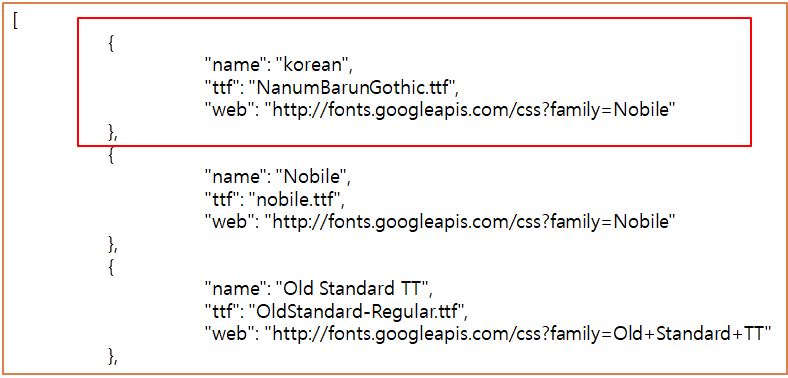

- 위와 같이 설정 후 jupyter notebook 새로 실행
- Kernel-> Restart
- create_tag_image() 함수의 fontname=‘korean’으로 변경

In [7]:
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='Korean', rectangular=False)